In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
data(diamonds)
df <- diamonds

head(df)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [6]:
colnames(df)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [7]:
summary(df)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [8]:
summary(df$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

In [9]:
#Log(price):
df <- df  %>% 
    mutate(logprice = log(price))

head(df)

carat,cut,color,clarity,depth,table,price,x,y,z,logprice
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43,5.786897
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31,5.786897
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31,5.789960
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63,5.811141
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75,5.814131
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48,5.817111


In [10]:
df <- df[c("color", "price", "logprice")]

In [13]:
sum(is.na(df))

[1] 0

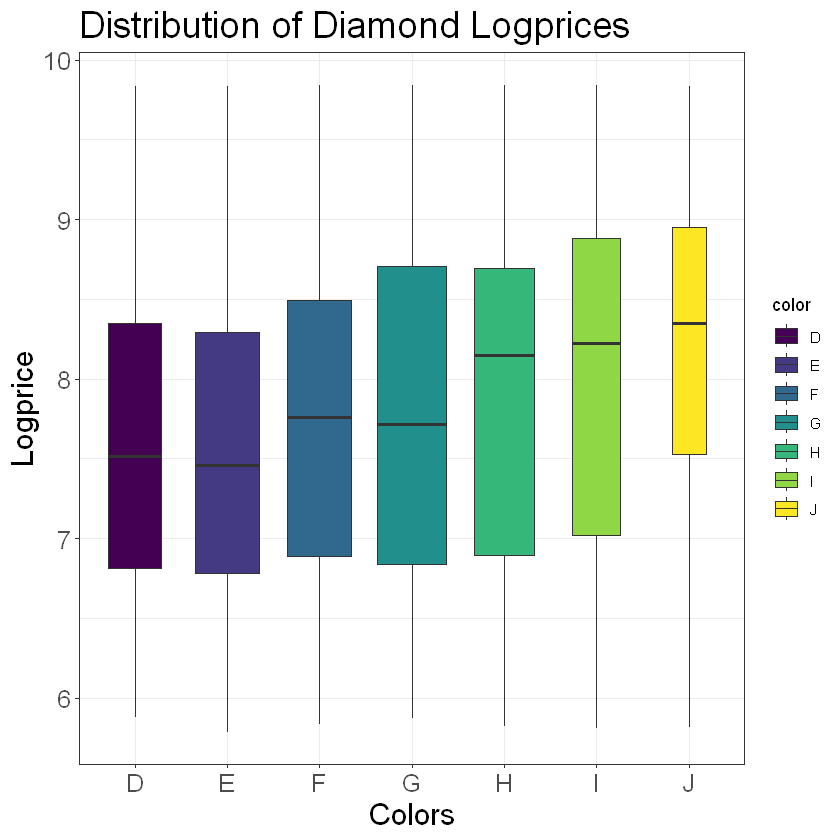

In [28]:
ggplot(df, aes(y=logprice,x= color,fill=color))+ 
geom_boxplot(varwidth=T)  +
labs(x="Colors",
         y="Logprice", 
       title="Distribution of Diamond Logprices")+  
theme_bw()+
theme(plot.title = element_text(size=22)
      ,axis.text.x= element_text(size=15),
       axis.text.y= element_text(size=15),
        axis.title=element_text(size=18))

There seems to be some variation in the log of the price, but it's not clear if there is a difference based on color grade. So let's test it out using a **one-way ANOVA**.

# 1) One-Way ANOVA

In [32]:
unique(df$color)

[1] E I J H F G D
Levels: D < E < F < G < H < I < J

In [34]:
class(df$color)

[1] "ordered" "factor"

## Building the model

In [40]:
# Define the formula
formula <- logprice ~ as.factor(color)

# Create and fit the model
model <- lm(logprice ~ as.factor(color), data = df)

# Display model summary
summary(model)


Call:
lm(formula = logprice ~ as.factor(color), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.33184 -0.87715 -0.00128  0.78131  2.25853 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         7.833673   0.004754 1647.806  < 2e-16 ***
as.factor(color).L  0.497083   0.014544   34.177  < 2e-16 ***
as.factor(color).Q  0.066926   0.013839    4.836 1.33e-06 ***
as.factor(color).C -0.028781   0.013029   -2.209 0.027186 *  
as.factor(color)^4  0.039521   0.011967    3.303 0.000959 ***
as.factor(color)^5 -0.050750   0.011313   -4.486 7.28e-06 ***
as.factor(color)^6  0.051659   0.010257    5.036 4.76e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 53933 degrees of freedom
Multiple R-squared:  0.02577,	Adjusted R-squared:  0.02567 
F-statistic: 237.8 on 6 and 53933 DF,  p-value: < 2.2e-16


In [42]:
library(car)
anova_result <- Anova(model, type = "II")
print(anova_result)

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




Anova Table (Type II tests)

Response: logprice
                 Sum Sq    Df F value    Pr(>F)    
as.factor(color)   1431     6  237.81 < 2.2e-16 ***
Residuals         54100 53933                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


The **p-values** are smaller than 0.05, so the results are statistically significant, and therefore we can reject the Null Hypothesis **$H^0$** which is that the mean price is the same across all the diamond colors.

Now that we have significant results from anova test, we can run **Tukey's HSD** post hoc test.

### Anova Post hoc test

In [44]:
# Run one-way ANOVA
anova_result <- aov(logprice ~ color, data = df)

# Perform Tukey's HSD test
tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = logprice ~ color, data = df)

$color
           diff         lwr         upr     p adj
E-D -0.03750025 -0.08415876 0.009158265 0.2115210
F-D  0.14553467  0.09862197 0.192447371 0.0000000
G-D  0.17267847  0.12730024 0.218056704 0.0000000
H-D  0.30154098  0.25319810 0.349883867 0.0000000
I-D  0.40605693  0.35225018 0.459863674 0.0000000
J-D  0.52906556  0.46279171 0.595339398 0.0000000
F-E  0.18303492  0.14056364 0.225506199 0.0000000
G-E  0.21017872  0.16940873 0.250948711 0.0000000
H-E  0.33904123  0.29499531 0.383087146 0.0000000
I-E  0.44355717  0.39357544 0.493538913 0.0000000
J-E  0.56656580  0.50335796 0.629773638 0.0000000
G-F  0.02714380 -0.01391685 0.068204450 0.4476501
H-F  0.15600631  0.11169121 0.200321404 0.0000000
I-F  0.26052226  0.21030315 0.310741365 0.0000000
J-F  0.38353088  0.32013518 0.446926587 0.0000000
H-G  0.12886251  0.08617515 0.171549860 0.0000000
I-G  0.23337845  0

# Two-Way ANOVA

In [48]:
diamonds$logprice <- log(diamonds$price)
df <- na.omit(diamonds[c("color", "cut", "logprice")])
head(df)

color,cut,logprice
<ord>,<ord>,<dbl>
E,Ideal,5.786897
E,Premium,5.786897
E,Good,5.789960
I,Premium,5.811141
J,Good,5.814131
J,Very Good,5.817111


In [49]:
unique(df$cut)

[1] Ideal     Premium   Good      Very Good Fair     
Levels: Fair < Good < Very Good < Premium < Ideal

In [50]:
class(df$cut)

[1] "ordered" "factor"

## Build the Model

In [56]:
# Define the formula
formula <- logprice ~ as.factor(cut) + as.factor(color)

# Create and fit the model
model <- lm(formula = formula, data = df)

# Display model summary
summary(model)


Call:
lm(formula = formula, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38524 -0.84460  0.01333  0.76191  2.39562 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)         7.904376   0.006629 1192.394  < 2e-16 ***
as.factor(cut).L   -0.235830   0.017060  -13.824  < 2e-16 ***
as.factor(cut).Q    0.010586   0.015202    0.696  0.48622    
as.factor(cut).C   -0.195884   0.013235  -14.800  < 2e-16 ***
as.factor(cut)^4   -0.073589   0.010664   -6.901 5.23e-12 ***
as.factor(color).L  0.476286   0.014440   32.984  < 2e-16 ***
as.factor(color).Q  0.059368   0.013730    4.324 1.54e-05 ***
as.factor(color).C -0.032800   0.012924   -2.538  0.01115 *  
as.factor(color)^4  0.038279   0.011869    3.225  0.00126 ** 
as.factor(color)^5 -0.055887   0.011221   -4.980 6.36e-07 ***
as.factor(color)^6  0.043247   0.010177    4.250 2.15e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.99

In [58]:
library(car)
anova_result <- Anova(model, type = "II")
print(anova_result)

Anova Table (Type II tests)

Response: logprice
                 Sum Sq    Df F value    Pr(>F)    
as.factor(cut)      902     4  228.58 < 2.2e-16 ***
as.factor(color)   1326     6  224.04 < 2.2e-16 ***
Residuals         53198 53929                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Since the **p-value** is small in all 3, we can reject all 3 Null Hypotheses.

**TWO-way ANOVA results** :
* Logarithm of price is **NOT** the same for different colors
* Logarithm of the price is **NOT** the same for different diamond cuts
* There is an interaction effect between the color and cut that impacts the price of the diamond